# Анализ оттока клиентов

# Описание проекта
Заказчик - отдел маркетинга “Метанпромбанка”.

Наш банк в срочном порядке ищет аналитиков с уверенным владением «Python». Вашей главной задачей станет анализ оттока клиентов. Анализ покажет, какие клиенты уходят из банка, а так же поможет нам составить сегменты клиентов, которые склонны уходить из банка.

В нашем распоряжении датасет bank_scrooge.csv содержащий данные о клиентах банка «Метанпромбанк». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

# Цель проекта
Минимизирование оттока клиентов банка на основе анализа данных, который включает в себя:

1. Проведение исследовательского анализа даных;
2. Проверка гипотез.

# План проекта
1. Обзор данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Проверка статистических гипотез
5. Подведение промежуточных итогов
6. Сегментация клиентов по признакам отточности
7. Приоритизация сегментов
8. Выводы и рекомендации

# Описание даных
Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.  
Колонки содержащиеся в файле `bank_scrooge.csv`: 

`USERID` — идентификатор пользователя,  
`score` — баллы кредитного скоринга,  
`city` — город,  
`gender` — пол,  
`age` — возраст,  
`equity` — количество баллов собственности,  
`balance` — баланс на счёте,  
`products` — количество продуктов, которыми пользуется клиент,  
`credit_card` — есть ли кредитная карта,  
`last_activity` — активный клиент,  
`EST_SALARY` — оценочный доход клиента,  
`сhurn` — признак оттока.

## Обзор даных

### Импорт библиотек

In [1]:
import pandas as pd
import scipy.stats as stats
from scipy import stats as st
import math as mth
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
try:
    import phik
except:
    !pip install phik -q
import phik
from phik import phik_matrix
from phik.report import plot_correlation_matrix

### Обзора дыннх датафрейма

In [2]:
#считываем датафрейм
df = pd.read_csv('/datasets/bank_scrooge.csv')

In [3]:
print('---------------------------Первые 5 строк----------------------------')
display(df.head())
print(' ')
print(' ')
print('--------------Общая информация--------------')
print(' ')
print(df.info())
print(' ')
print('-------------Пропуски------------- ')
print(' ')
count=0
for element in df.columns:
    if df[element].isna().sum() > 0:
        print(element, ' - ', df[element].isna().sum(), 'пропусков')
        count = +1
if count == 0:
    print(' ')
    print('Пропусков НЕТ')
print(' ')

---------------------------Первые 5 строк----------------------------


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


 
 
--------------Общая информация--------------
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
None
 
-------------Пропуски------------- 
 
age  -  26 пропусков
balance  -  2295 пропусков
 


В датафрейме 10000 записей, все столбцы кроме возраста (age) и баланса (balance) имеют полные данные. Названия столцов `USERID` и `EST_SALARY` заполнены с нарушением стиля.

Предварительно можно утверждать что данных достаточно для анализа.
На этапе предобработки необходимо выполнить следующую работу:
1. Исправить нарушения стиля в названиях столбцов
2. В столбце `gender` заменить значения М на 1 и Ж на 0. В данном столбце также есть 26 пропусков. Количество пропусков небольшое, поэтому чтобы оставить данные полными принято решение заполнить пустые значения средними.
3. Изменить тип данных в столбцах `score` и `age` с float на int
4. Проанализировать столбец `balance` чтобы принять решение о работе с пропусками в этом столбце.
5. Провести проверку на дубликаты

## Предобработка данных

### Приведение названия столбцов к одному стилю

In [4]:
df = df.rename (columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


### Заполним пустые значения в столбце `age ` и изменим типы даных в столбцах `score` и `age` c float на int

In [5]:
df['age'] = df['age'].fillna(df['age'].median())

In [6]:
df['score'] = df['score'].astype(int)
df['age'] = df['age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  int64  
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Анализ пропусков в столбце `balance` 

In [7]:
df['balance'].isnull().sum()

2295

Так как пустых значений больше 20% данных, то просто удалить их будет некорректно. Мы можем просто заполнить их средним или медиальным значением, но это может сильно повлиять на дальнейшие результаты исследования, поэтому попробуем понять природу этих пропусков методом describe для клиентов с пропусками в поле баланса и сравним значения с клиентами со всего датафрейма.

In [8]:
# Вызовем метод describe для значений с пропусками и всего датасета, и проанализируем их различия:
print('---------------------Метод describe для значений с пропусками------------------------')
display(df[df['balance'].isna()].describe())
print(' ')
print('---------------------Метод describe для всего датасета------------------------')
display(df.describe())

---------------------Метод describe для значений с пропусками------------------------


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2295.000000,2295.000000,2295.000000,2295.000000,0.0,2295.000000,2295.000000,2295.000000,2.295000e+03,2295.000000
mean,172069.447930,865.352070,42.078431,0.050980,NaN,1.162092,0.815686,0.549455,2.263102e+05,0.005664
std,33337.084589,89.603091,11.901109,0.225872,NaN,0.402532,0.387824,0.497657,1.997718e+05,0.075066
min,114182.000000,642.000000,18.000000,0.000000,NaN,0.000000,0.000000,0.000000,2.027403e+04,0.000000
25%,143095.500000,871.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.203477e+05,0.000000
50%,172659.000000,903.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.741607e+05,0.000000
75%,201551.000000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.400150e+05,0.000000
max,229145.000000,990.000000,86.000000,3.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000


 
---------------------Метод describe для всего датасета------------------------


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,10000.00000,10000.000000,10000.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.727300,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.164922,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Данный анализ позволяет сделать следующие выводы о пользователях с пропусками в балансе:
1. Они имеют более низкие оценки собственности
2. Они пользуются чуть меньшим числом продуктов
3. У них чуть более высокие зарплаты
4. В среднем они немного моложе 

Данная проверка не помогла четко понять из-за чего появились пропуски. Дополнительно стоит выяснить связаны ли пропуски с фактом оттока клиентов из банка 

In [9]:
df[df['balance'].isna()]['churn'].value_counts()

0    2282
1      13
Name: churn, dtype: int64

Всего 13 пропусков из всего числа могут быть связаны с тем что клиент ушел из банка, поэтому и эта гипотеза о том что пропуски связаны с оттоком клиентов не подтвердилась.

Так как четко определить природу пропусков не вышло, то принято решение оставить пропуски пустыми.

### Проверка на наличие дубликатов

In [10]:
#найдем  количестве полных дубликатов в датасете:
df.duplicated().sum()

0

In [11]:
# найдем дубликаты в столбце user_id:
df['user_id'].duplicated().sum()

73

В столбце индентификаторов пользователей было обнаружено 73 пропуска, что составляет менее 1% от всех записей в датасете. Так как такое количество записей никак не повлияет на общий анализ, то их можно просто удалить.

In [12]:
df ['user_id'] = df['user_id'].drop_duplicates().reset_index(drop=True)

Дополнительно проведем проверку на неявные дубликаты в столбцах с категориальными переменными

In [13]:
df['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [14]:
df['gender'].unique()

array(['Ж', 'М'], dtype=object)

В датафрейме всего 3 города и 2 пола, можно считать что все в порядке.

### Кодирование данных

Для дальнейшего анализа нам необходимо перевести столбцы `city` и `gender` в числовые значения

In [15]:
#Для кодировки данных создадим новые тослдцы с категориальными значениями и применим к ним функцию get_dummies()
df['dummies_city'] = df['city']
df['dummies_gender'] = df['gender']
df = pd.get_dummies (df, columns=['dummies_gender', 'dummies_city'])
display(df.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,dummies_gender_Ж,dummies_gender_М,dummies_city_Ростов,dummies_city_Рыбинск,dummies_city_Ярославль
0,183012.0,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,1,0,0,1,0
1,146556.0,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,1,0,0,1,0
2,120722.0,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1,0,0,1,0
3,225363.0,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,1,0,0,0,1
4,157978.0,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,1,0,0,1


Во время предобработки была выполнена следующая работа: 
1. Столбцы `user_id` и `est_salary` приведены к правильному виду
2. Были заполнены пустые значения в столбце `age` на медиану. Также были изменены типы даных с толбцах `age` и `score` с float На int.
3. Был проведен анализ пропусков в столбце `balance` по итогу которого было принято решение оставить пустые значения не заполнеными для того чтобы избежать искажения результатов. 
4. Была проведена проверка на дубликаты, в датафрейме явных дубликатов не оказалось. 
5. При проверке столбца `user_id` на наличие неявных дубликатов было обнаружено 73 одинаковых записи. Так как количество неявных дубликатов этого столбца менее 1% от общего количества записей в датафрейме, то было принято решение просто удалить эти записи.
6. Была проведена проверка наличия неявных дубликатов в столбцах `city` и `gender` с категориальными переменными. Проверка не выявила каких-либо ошибок. 
7. Была проведена кодировка данных методом get_dummies, в следствии чего данные были заменены с категориальных значений на 0 и 1.

После проведения предобработки можно считать что данных достаточно для проведения анализа даных.

## Исследовательский анализ данных

### Анализ распределения

#### Для начала проведем анализ числовых признаков.

In [16]:
def hist_box(df,col):
    fig, axs = plt.subplots(ncols=2,figsize=(16,8))
    sns.set(font_scale=1.10)
    histplot = sns.histplot(df[col],ax=axs[0], color='green', bins=30).set_title(f'Распределение {col}',fontsize=20);
    sns.boxplot(df[col], ax=axs[1]).set_title(f'Ящик с усами {col}',fontsize=20); 
    
    print(df[col].describe()) 

count    10000.000000
mean       848.699400
std         65.448519
min        642.000000
25%        802.000000
50%        853.000000
75%        900.000000
max       1000.000000
Name: score, dtype: float64


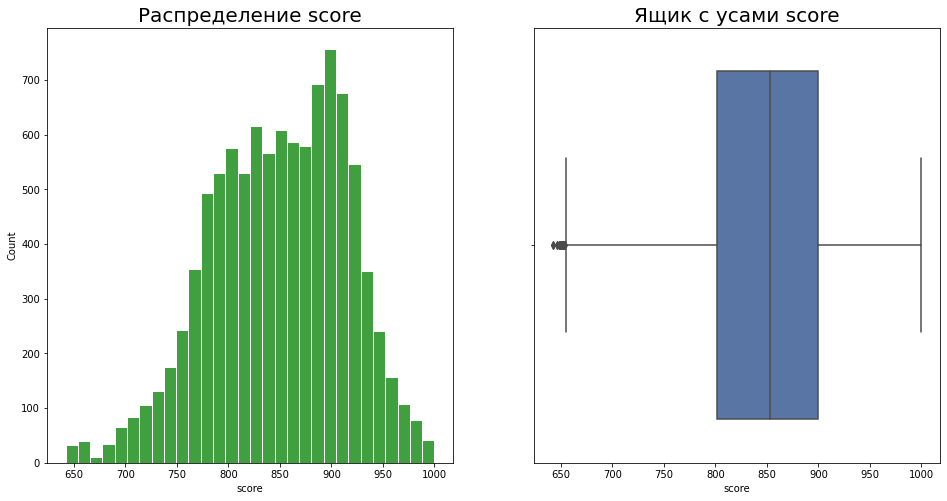

In [17]:
hist_box(df,'score')

Распределение значений скоринга нормальное. Есть небольшое число выбросов, но они в пределах нормы.

count    10000.000000
mean        42.727300
std         12.164922
min         18.000000
25%         33.000000
50%         40.000000
75%         51.000000
max         86.000000
Name: age, dtype: float64


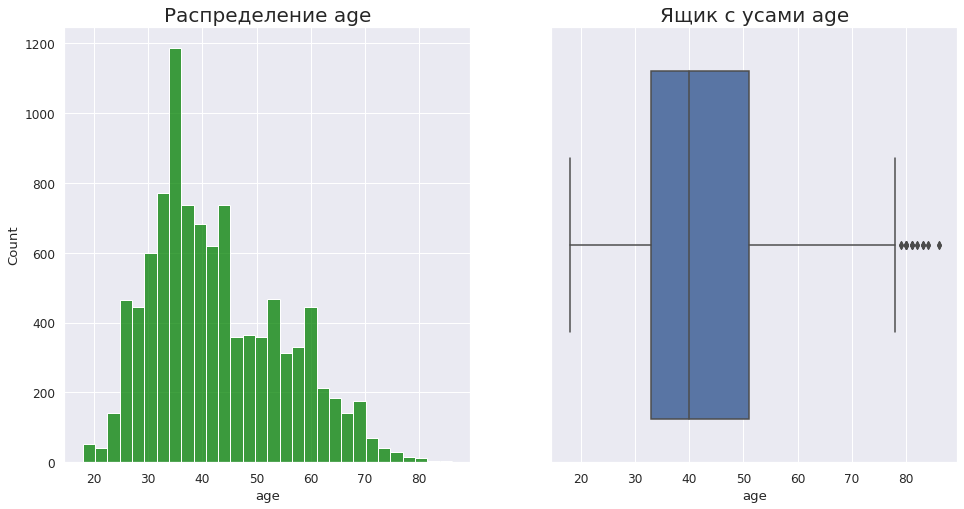

In [18]:
hist_box(df,'age')

Распределение имеет достаточно длинный правый хвост и небольшое количество выбросов ближе к 80 годам.

count    7.705000e+03
mean     8.277943e+05
std      1.980614e+06
min      0.000000e+00
25%      2.955542e+05
50%      5.242722e+05
75%      9.807058e+05
max      1.191136e+08
Name: balance, dtype: float64


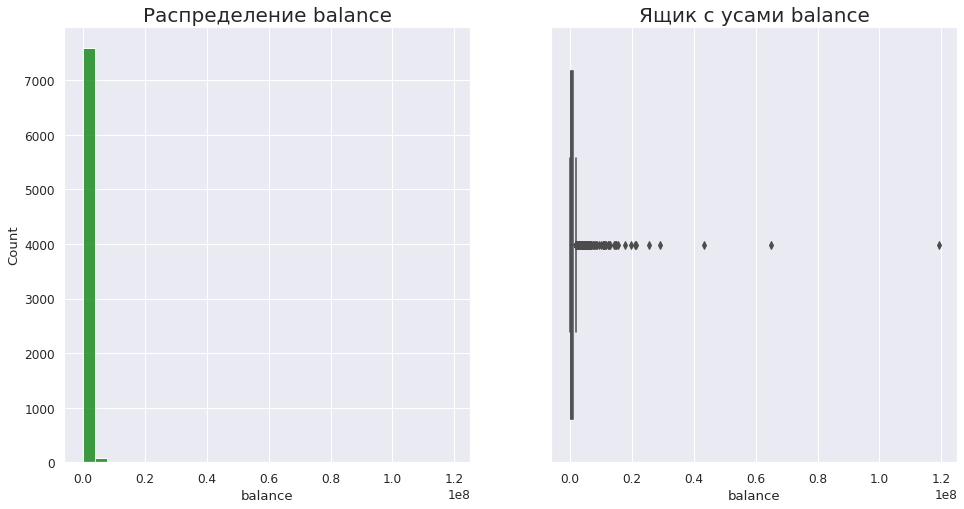

In [19]:
hist_box(df,'balance')

Распределение по балансу из-за выбросов не дает нам сделать увидеть полную картину.

count    1.000000e+04
mean     1.478669e+05
std      1.393885e+05
min      2.546300e+03
25%      7.525190e+04
50%      1.196581e+05
75%      1.745005e+05
max      1.395064e+06
Name: est_salary, dtype: float64


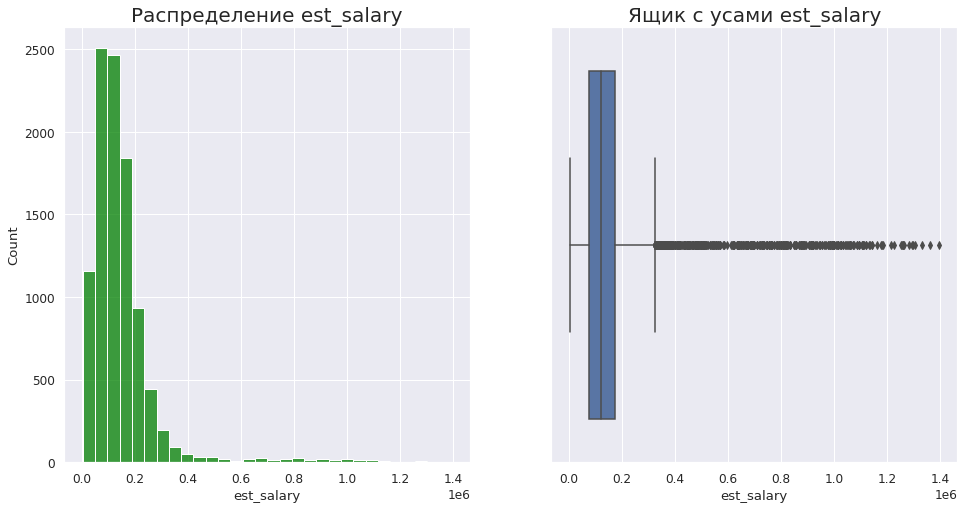

In [20]:
hist_box(df,'est_salary')

По доходу клиентов так же много выбросов. 

Попробуем избавиться от выбросов для значений возраста, баланса и дохода клиентов

In [21]:
print('Количество клиентов старше 75 лет:', len(df.query('age > 75')))
print('Процент от общего числа:', round(len(df.query('age > 75'))/len(df)*100, 2))

Количество клиентов старше 75 лет: 49
Процент от общего числа: 0.49


In [22]:
print('Количество клиентов с балансом ниже 10000 и выше 3.5 млн:', len(df.query('10000 > balance or balance > 3500000')))
print('Процент от общего числа:',len(df.query('balance > 3500000 or balance < 10000'))/len(df)*100)

Количество клиентов с балансом ниже 10000 и выше 3.5 млн: 208
Процент от общего числа: 2.08


In [23]:
print('Количество клиентов с доходом выше 1000000  :', len(df.query('est_salary>=1000000')))
print('Процент от общего числа:', round(len(df.query('est_salary>=1000000'))/len(df)*100, 2))

Количество клиентов с доходом выше 1000000  : 59
Процент от общего числа: 0.59


В общем выбросов по этим параметрам достаточно мало и их можно удалить, чтобы они не искажали наши данные.

In [24]:
df=df[df['age'] <= 75]
drop = df.query('balance > 3500000 or balance < 10000')
df.drop(drop.index, axis=0, inplace=True)
df=df[df['est_salary'] <= 1000000]
len(df)

9702

После удаления мы потеряли меньше 30 значений, но наш датафрейм стал немного "чище"

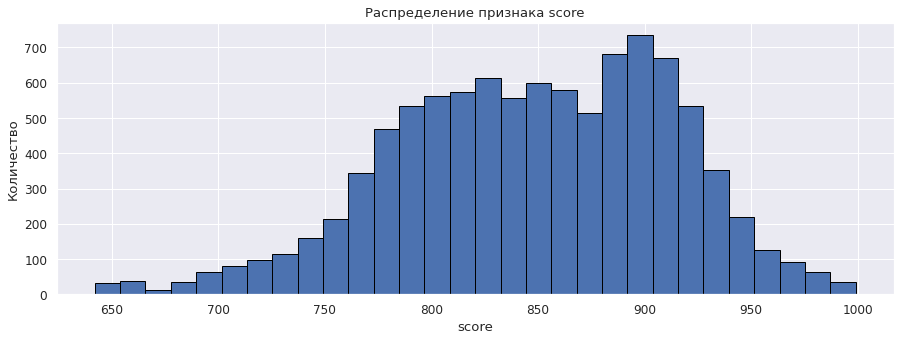

count    9702.000000
mean      847.592352
std        64.363912
min       642.000000
25%       802.000000
50%       851.000000
75%       898.000000
max       999.000000
Name: score, dtype: float64


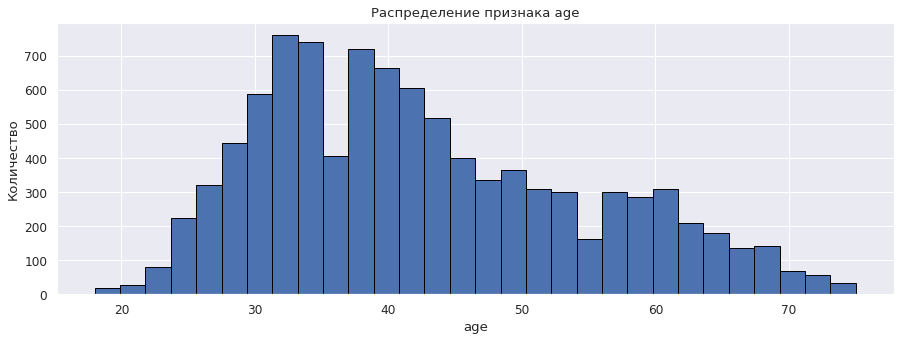

count    9702.000000
mean       42.580293
std        11.909769
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        75.000000
Name: age, dtype: float64


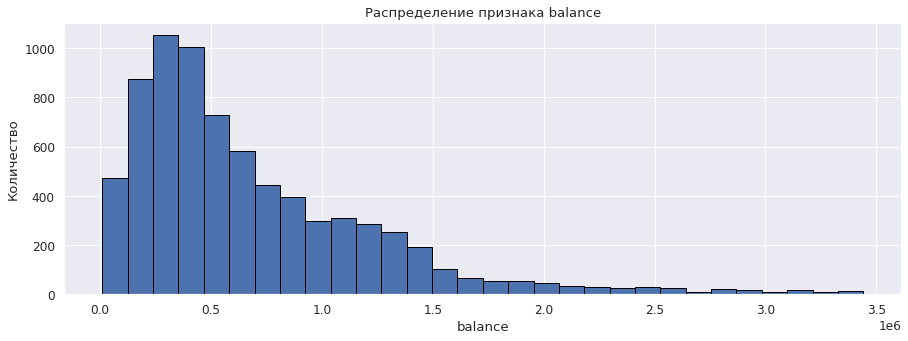

count    7.460000e+03
mean     6.885498e+05
std      5.618857e+05
min      1.010501e+04
25%      2.954182e+05
50%      5.146577e+05
75%      9.403693e+05
max      3.441297e+06
Name: balance, dtype: float64


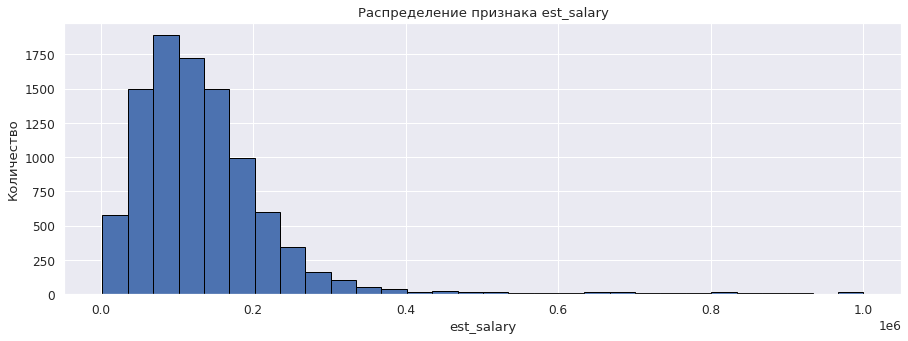

count      9702.000000
mean     138751.089182
std      109076.039468
min        2546.300000
25%       75140.982500
50%      118653.955000
75%      171444.647500
max      999965.310000
Name: est_salary, dtype: float64


In [25]:
# создадим список с числовыми значениями
num_col=['score', 'age', 'balance', 'est_salary']
# построим графики распределения для каждого параметра
for i in range(len(num_col)):
    plt.figure(figsize=(15, 5))
    plt.hist(df[num_col[i]], edgecolor = 'black', bins = 30)
    plt.title(f"Распределение признака {num_col[i]}")
    plt.ylabel("Количество")
    plt.xlabel(num_col[i])
    plt.show()
    print(df[num_col[i]].describe())

После анализа числовых параметров и удаления выбросов можно сделать следующий вывод:
1. В среднем кредитныф скоринг клиентов - 847
2. Средний возраст клиентов - 42 года
3. В среднем на счету у клиентов 690 тыс
4. Средний доход клиентов банка 140 тыс

#### Теперь посмотрим на распределение данных в относительно оттока

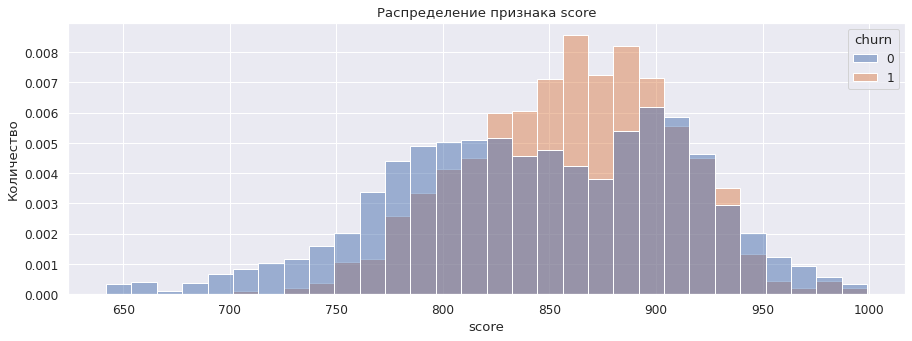

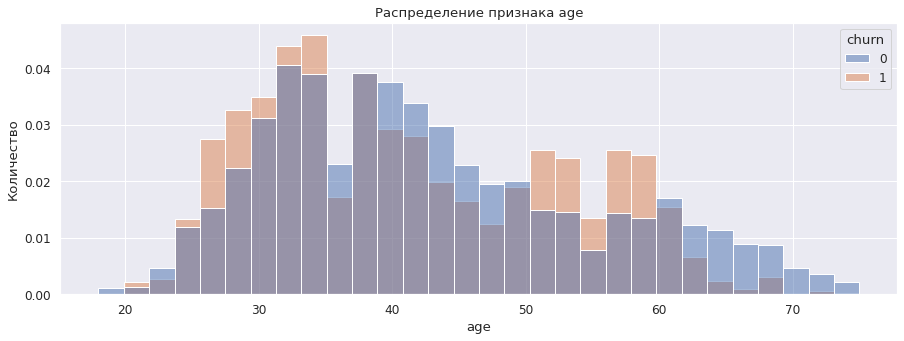

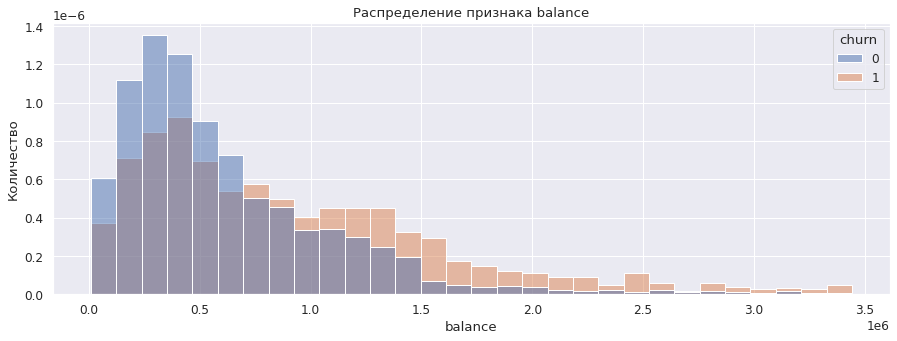

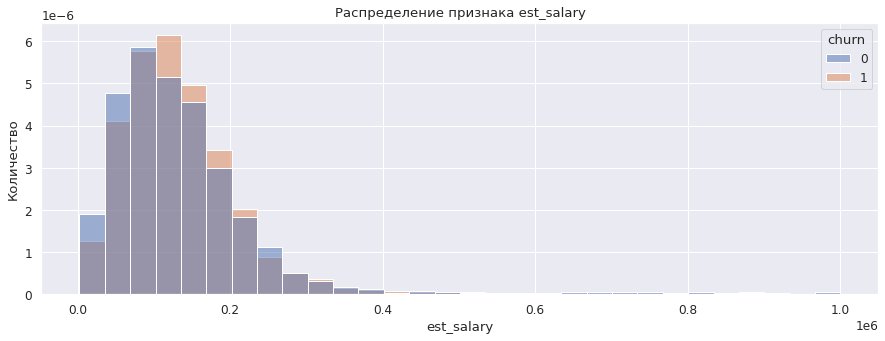

In [26]:
for i in range(len(num_col)):    
    fig, axs = plt.subplots(figsize=(15, 5))
    sns.histplot(data=df, x= df[num_col[i]], hue="churn", stat="density", common_norm=False, bins = 30)
    plt.title(f"Распределение признака {num_col[i]}")
    plt.ylabel("Количество")
    plt.xlabel(num_col[i])
    plt.show()

Интервалы значений, в которых есть повышенный отток:
1. Скорринг от 820 и до 900
2. Возраст от 25 до 35 и от 50 до 60 лет
3. Баланс на счете от 700 тыс. и выше
4. Доход клиентов от 100 тыс до 200 тыс.

#### Теперь проведем анализ категориальных признаков

In [27]:
# создадим список с категориальными значениями
cat_col=['equity', 'products']
# создадим список с категориальными переменными для круговой диаграммы
cat_col_d=['city', 'gender', 'credit_card', 'last_activity', 'churn']
# создадим список с категориальными переменными для сравнения с признаком оттока
cat_col_o=['city', 'gender', 'credit_card', 'last_activity']

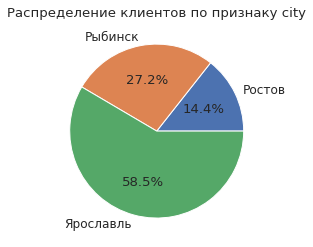

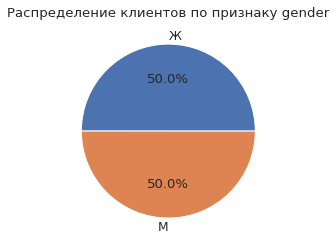

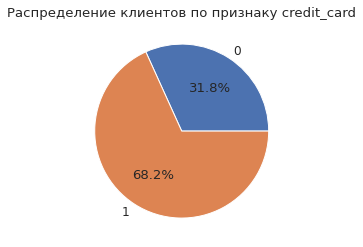

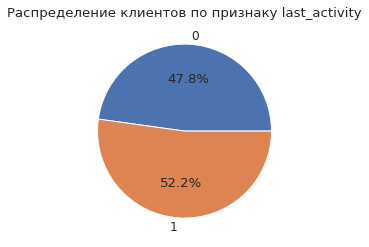

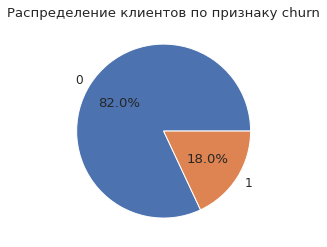

In [28]:
for i in range(len(cat_col_d)):
    data = df.groupby([cat_col_d[i]]).agg({'user_id': 'count'})
    fig1,ax1 = plt.subplots()
    ax1.pie(data['user_id'], labels=data.index, autopct='%1.1f%%')
    ax1.set_title(f'Распределение клиентов по признаку {cat_col_d[i]}')
    plt.show()

In [29]:
def hist(df,col):
    fig, axs = plt.subplots(ncols=1,figsize=(15,5))
    sns.histplot(df[col], color='green', bins=30).set_title(f'Распределение {col}',fontsize=20)
    print(df[col].describe()) 

count    9702.000000
mean        2.616368
std         1.979696
min         0.000000
25%         0.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: equity, dtype: float64


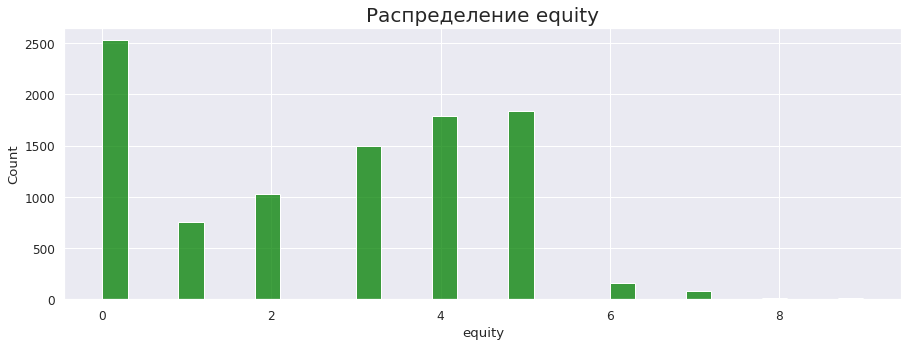

In [30]:
hist(df,'equity')

count    9702.000000
mean        1.864049
std         0.787994
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: products, dtype: float64


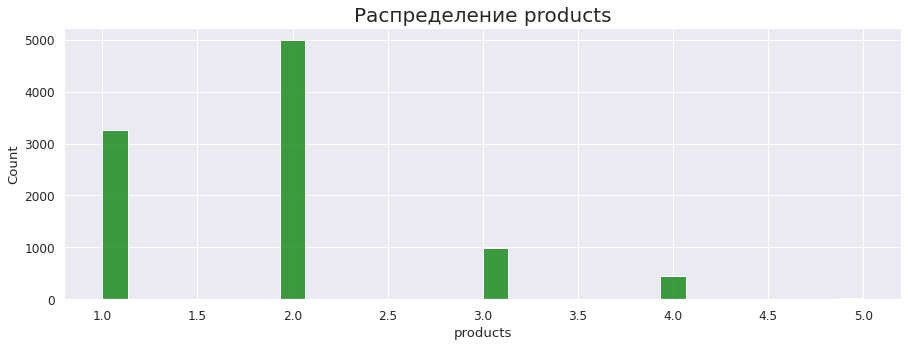

In [31]:
hist(df,'products')

После анализа категориальных параметров получили следующие данные:
1. Больше всего клиентов в городе Ярославль (58%), после него идет Рыбинск (27%) и в конце Ростов (14%)
2. Распределение пола в банке поровну
3. У 68% клиентов есть кредитная карта
4. 52% клиентов активны
5. 82% клиентов намерены остаться в банке
6. В среднем клиенты имеюь 3 балла недвижимости
7. В среднем клиенты пользуются 2 продуктами банка

#### Посмотрим на распределение даных относительно оттока клиентов

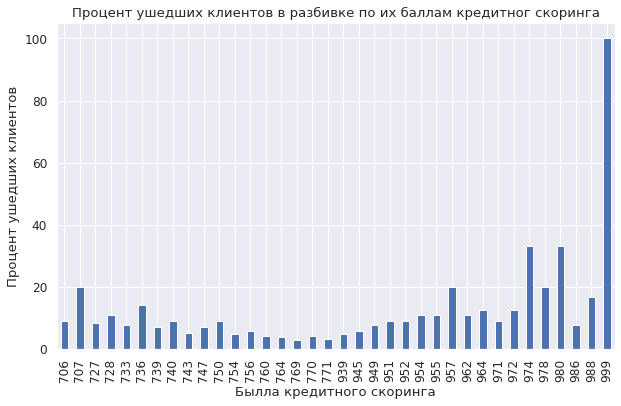

In [32]:
#рассчитаем процент ушедших клиентов
score_churn = df.pivot_table (index = 'score', values = 'churn', aggfunc = ['sum', 'count'])
score_churn.columns = score_churn.columns.droplevel(level=1)
score_churn ['%'] = score_churn['sum']/score_churn['count']*100
score_churn = score_churn [score_churn['sum']==1]
#построим столбчатую диаграмму:
score_churn['%'].plot (
    kind='bar', title = 'Процент ушедших клиентов в разбивке по их баллам кредитног скоринга',
    xlabel = 'Былла кредитного скоринга', ylabel = 'Процент ушедших клиентов', figsize = (10,6));


Клиенты ушедший из банка имеют скоринг не ниже 706, до скоринга в 771 наблюдается тендентция к снижению количества ушедших клиентов, но после 771 количество ушедших клиентов резко возрастает. Возможно это связано с тем, что клиенты с высоким кредитным скорингом не находят для себя хорошего предложения от банка.

,sum,count,%
city,,,
Ростов,261,1397,18.682892
Рыбинск,423,2636,16.047041
Ярославль,1065,5669,18.786382


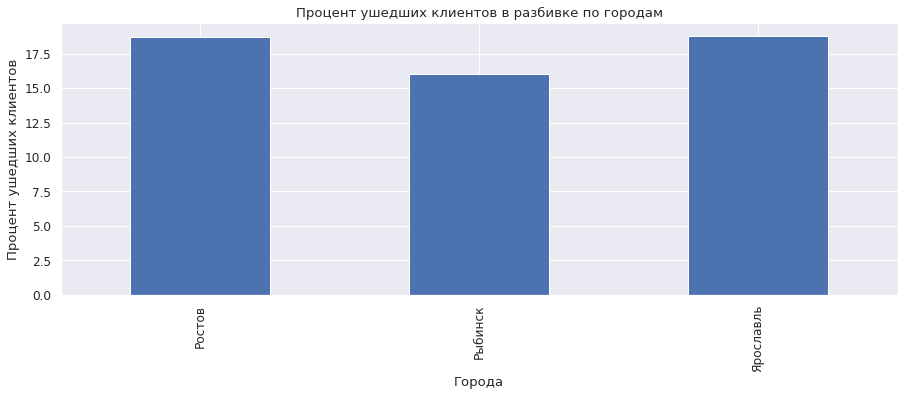

In [33]:
#рассчитаем процент ушедших клиентов
city_churn = df.pivot_table (index = 'city', values = 'churn', aggfunc = ['sum', 'count'])
city_churn.columns = city_churn.columns.droplevel(level=1)
city_churn ['%'] = city_churn['sum']/city_churn['count']*100
#построим столбчатую диаграмму:
city_churn['%'].plot (
    kind='bar', title = 'Процент ушедших клиентов в разбивке по городам',
    xlabel = 'Города', ylabel = 'Процент ушедших клиентов', figsize = (15,5));
city_churn

Больше всего ушедших клиентов клиентов в Ярославле - 1065, но также здесь и больший % оттока - 18.7 .

,sum,count,%
gender,,,
Ж,621,4854,12.793572
М,1128,4848,23.267327


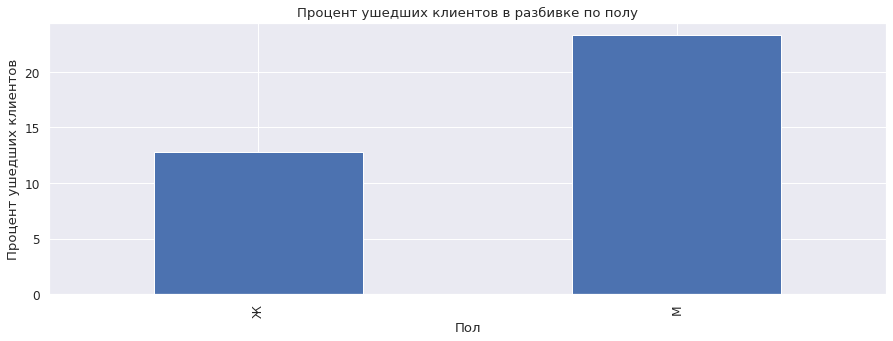

In [34]:
#рассчитаем процент ушедших клиентов
gender_churn = df.pivot_table (index = 'gender', values = 'churn', aggfunc = ['sum', 'count'])
gender_churn.columns = gender_churn.columns.droplevel(level=1)
gender_churn ['%'] = gender_churn['sum']/gender_churn['count']*100
#построим столбчатую диаграмму:
gender_churn['%'].plot (
    kind='bar', title = 'Процент ушедших клиентов в разбивке по полу',
    xlabel = 'Пол', ylabel = 'Процент ушедших клиентов', figsize = (15,5));
gender_churn

Среди женщин доля отточности почти в 2 раза ниже, чем у мужчин.

,sum,count,%
credit_card,,,
0,779,3082,25.275795
1,970,6620,14.652568


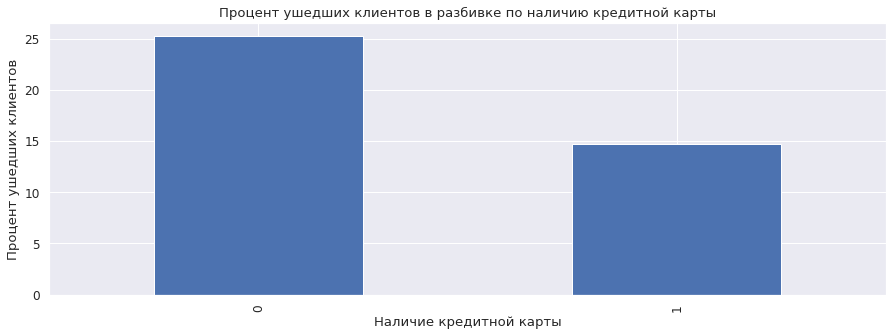

In [35]:
#рассчитаем процент ушедших клиентов
credit_card_churn = df.pivot_table (index = 'credit_card', values = 'churn', aggfunc = ['sum', 'count'])
credit_card_churn.columns = credit_card_churn.columns.droplevel(level=1)
credit_card_churn ['%'] = credit_card_churn['sum']/credit_card_churn['count']*100
# Построим столбчатую диаграмму:
credit_card_churn['%'].plot (
    kind='bar', title = 'Процент ушедших клиентов в разбивке по наличию кредитной карты',
    xlabel = 'Наличие кредитной карты', ylabel = 'Процент ушедших клиентов', figsize = (15,5), xlim=(1,5));
credit_card_churn

Отточность пользователей с кредитной картой почти в 2 раза ниже, чем у пользователей без неё. Возможно это связано с тем, что пользователям нравится этот вид продкута.

,sum,count,%
last_activity,,,
0,522,4634,11.264566
1,1227,5068,24.210734


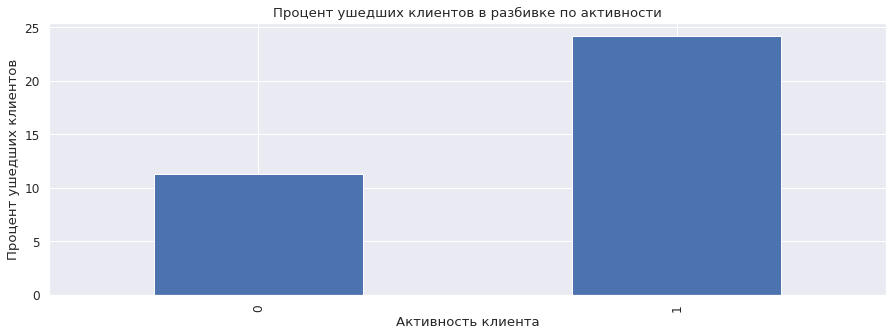

In [36]:
#рассчитаем процент ушедших клиентов
last_activity_churn = df.pivot_table (index = 'last_activity', values = 'churn', aggfunc = ['sum', 'count'])
last_activity_churn.columns = last_activity_churn.columns.droplevel(level=1)
last_activity_churn ['%'] = last_activity_churn['sum']/last_activity_churn['count']*100
# Построим столбчатую диаграмму:
last_activity_churn['%'].plot (
    kind='bar', title = 'Процент ушедших клиентов в разбивке по активности',
    xlabel = 'Активность клиента', ylabel = 'Процент ушедших клиентов', figsize = (15,5), xlim=(1,5));
last_activity_churn

Отток активных клиентов банка в 2 раза выше, чем у неактивных. Скорее всего это связано с тем, что активное использование продуктов повышает вероятность негативного опыта взаимодействия с банком..

,sum,count,%
equity,,,
0,88,2527,3.482390
1,90,756,11.904762
2,164,1031,15.906887
3,311,1497,20.774883
4,446,1790,24.916201
5,548,1839,29.798804
6,55,156,35.256410
7,34,77,44.155844
8,6,16,37.500000


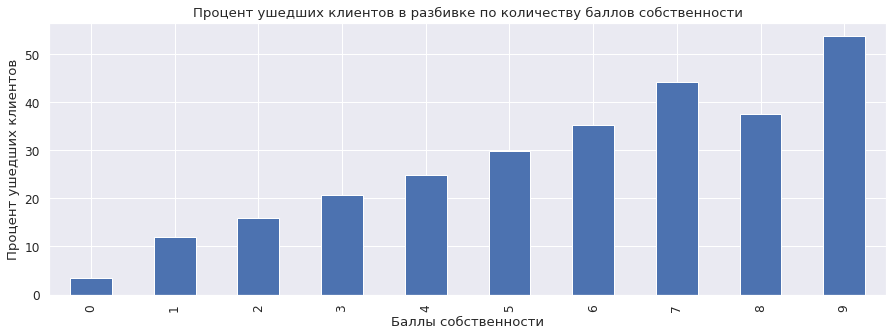

In [37]:
#рассчитаем процент ушедших клиентов
equity_churn = df.pivot_table (index = 'equity', values = 'churn', aggfunc = ['sum', 'count'])
equity_churn.columns = equity_churn.columns.droplevel(level=1)
equity_churn ['%'] = equity_churn['sum']/equity_churn['count']*100
#построим столбчатую диаграмму:
equity_churn['%'].plot (
    kind='bar', title = 'Процент ушедших клиентов в разбивке по количеству баллов собственности',
    xlabel = 'Баллы собственности', ylabel = 'Процент ушедших клиентов', figsize = (15,5));
equity_churn

Чем выше балл собственности, тем выше отточность клиентов.

,sum,count,%
products,,,
1,225,3259,6.903958
2,948,4987,19.009425
3,284,990,28.686869
4,284,448,63.392857
5,8,18,44.444444


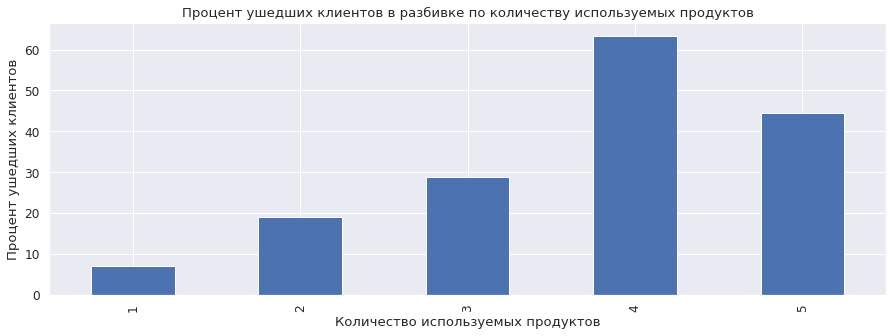

In [38]:
#рассчитаем процент ушедших клиентов
products_churn = df.pivot_table (index = 'products', values = 'churn', aggfunc = ['sum', 'count'])
products_churn.columns = products_churn.columns.droplevel(level=1)
products_churn ['%'] = products_churn['sum']/products_churn['count']*100
# Построим столбчатую диаграмму:
products_churn['%'].plot (
    kind='bar', title = 'Процент ушедших клиентов в разбивке по количеству используемых продуктов',
    xlabel = 'Количество используемых продуктов', ylabel = 'Процент ушедших клиентов', figsize = (15,5), xlim=(1,5));
products_churn

Меньше всего отточность клиентов имеющих 1 продукт банка,и чем большим количество продуктов пользуются клиенты, тем выше отточность. Больше же всего отточность у клиентов которые имели 4 продукта банка. Возможно это связано с тем, что пользователи получают негативный опыт от пользования более чем 1 продуктом банка.

Составим портрет клиента банка с высоким риском отточности: мужчина с высоким баллом кредитного скоринга и высокой активностью, с 4 и более балллами собственности, который пользуется 3 и более продуктами банка, но при этом не пользуется кредитной картой банка. Найдем же таких клиентов.

In [39]:
portrait = df.query (
    'gender==1 and equity>=5 and score>=771 and credit_card==0 and last_activity==1 and products >= 3 and churn==0') 
portrait

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,dummies_gender_Ж,dummies_gender_М,dummies_city_Ростов,dummies_city_Рыбинск,dummies_city_Ярославль


### Корреляционный анализ

Для начала нужно проверить как отток клиентов коррелирует с остальными параметрами. Так как идентификатов пользователей нас не интерисует, то избавимся от него.

In [40]:
bank_copy=df.copy()
bank_copy.drop(['user_id'], axis= 1 , inplace= True )

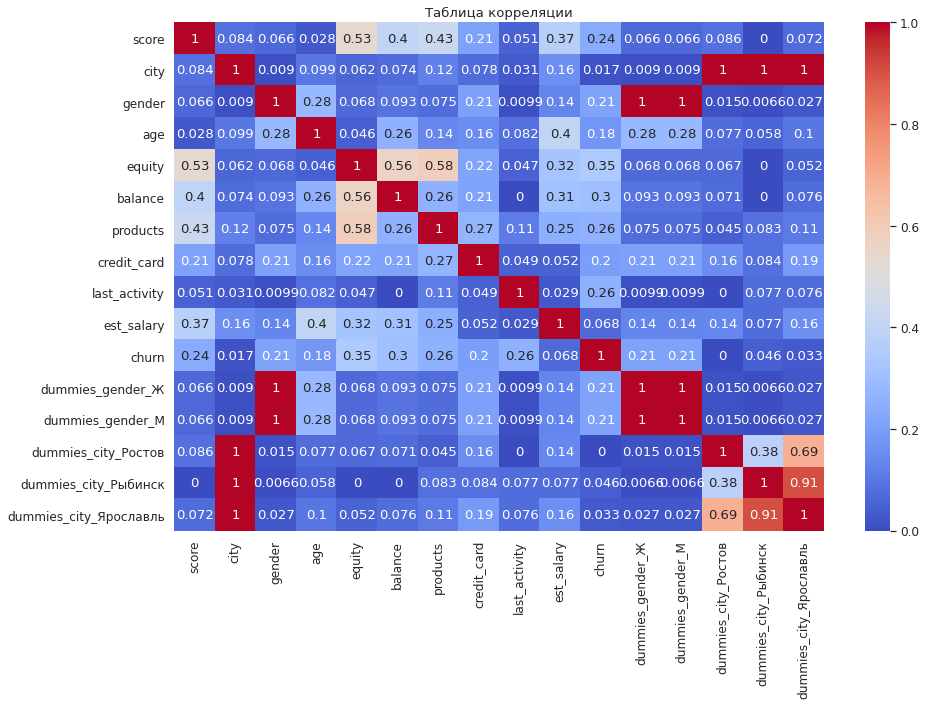

In [41]:
interval_cols = ['score', 'age', 'balance', 'est_salary']
plt.figure(figsize=(14, 10))
sns.heatmap(bank_copy.phik_matrix(interval_cols = interval_cols).fillna(0).values,
            cmap='coolwarm',
            xticklabels=bank_copy.phik_matrix(interval_cols=interval_cols).columns,
            yticklabels=bank_copy.phik_matrix(interval_cols=interval_cols).index,
            vmin=0, vmax=1, annot=True)
plt.title("Таблица корреляции")
plt.tight_layout()
plt.show()

По шкале Чеддока можно сказать, что высокой и весьма высокой зависимости между показателем оттока и имеющимися данными не наблюдается. При этом имеется умеренная положительная зависимость между оттоком и такими показателями как:
1. Количеством баллов собственности (equity)
2. Балансом на счете (balance)

Со всеми остальными показателями имеется слабая положительная зависимость. Значение в диапазоне от 0 до 0,26

По таблице видно что слабая и средняя корреляция оттока с остальными параметрами по шкале Чеддока следующая:
1. С столбцом баллов кредитного скоринга (score)
2. С столбцом пола (gender)
3. С столбцом возраста (age)
3. С столбцом количества баллов собственности (equity)
5. С столбцом баланса на счете (balance)
4. С столбцом количества продуктов, которыми пользуется клиент (products)
5. С столбцом кредитной карты (credit_card)
6. С столбцом активности клиента (last_activity)

## Проверка статистических гипотез

###  Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались

Сформулируем нулевую и альтернативную гипотезы:

H0: средние доходы оставшихся и ушедших клиентов равны  
H1: средние доходы оставшихся и ушедших клиентов не равны

Перед проверкой гипотез нужно определиться с методом. Разделим клиентов на 2 группы - тех, кто ушел из банка и тех, кто остался

In [42]:
print('Длина датасета клиентов, которые не ушли из банка: ', len(df.query('churn==0')))
print('Длина датасета клиентов, которые ушли из банка: ', len(df.query('churn==1')))

Длина датасета клиентов, которые не ушли из банка:  7953
Длина датасета клиентов, которые ушли из банка:  1749


Мы видим что наши данные в двух группах различаются по количеству строк. В певой таблице их 7953, во второй - 1749. При этом оба набора достаточно велики.

Критерии когда мы не можем использовать t-test:
1. t-тест предполагает, что дисперсии двух групп равны
2. t-тест требует, чтобы оба набора данных были достаточно велики (более 40)
3. t-тест предполагает, что данные в каждой группе следуют нормальному распределению


Оба наших набора данных достаточно велики, также стоит отметить что чем больше набор данных, тем он ближе к нормальному распределению. На первый пункт нельзя дать определенный ответ, поэтому при выполнении t-теста зададим параметр equal_var=False. С учетом сказанного можно считать что для импользования t-теста у нам нет никаких ограничений.

In [43]:
results = st.ttest_ind (
    df[df['churn']==0]['est_salary'],
    df[df['churn']==1]['est_salary'], equal_var = False)

alpha = 0.05

# вывод значения p-value на экран 
print (results.pvalue) 
# условный оператор с выводом строки с ответом

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

0.18979738794518333
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу о различии дохода между клиентами которые ушли и, клиентами которые остались отвергнуть не получилось.

###  Проверим гипотезу различия наличия или отсутствия кредитной карты между теми клиентами, которые ушли и теми, которые остались

Сформулируем нулевую и альтернативную гипотезы:

H0: среднее количество кредитных карт оставшихся и ушедших клиентов равны  
H1: среднее количество кредитных карт оставшихся и ушедших клиентов не равны  

Для проверки гипотезы проведем t-test:

In [44]:
# results = вызов метода для проверки гипотезы

results = st.ttest_ind (
    df[df['churn']==0]['credit_card'],
    df[df['churn']==1]['credit_card'], equal_var = False)

alpha = 0.05

# вывод значения p-value на экран 
print (results.pvalue) 
# условный оператор с выводом строки с ответом

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

1.589676729264592e-32
Отвергаем нулевую гипотезу


Нулевую гипотезу о различии наличия или отсутствия кредитной карты между клиентами которые ушли и, клиентами которые остались получилось отвергнуть. Как и было установлено в процессе анализа ушедшие клиенты намного реже пользовались кредитными картами в отличии от тех кто остался.

## Подведение промежуточных итогов

По итогу проделанной выше работы можно сделать следующие выводы:
1. В датафрейме 10000 записей, все столбцы кроме возраста (age) и баланса (balance) имеют полные данные. Названия столцов `USERID` и `EST_SALARY` заполнены с нарушением стиля. Предварительно можно утверждать что данных достаточно для анализа.
2. Во время предобработки была выполнена следующая работа:
    * Столбцы `user_id` и `est_salary` приведены к правильному виду
    * Были заполнены пустые значения в столбце `age` на медиану. Также были изменены типы даных с толбцах `age` и `score` с float На int.
    * Был проведен анализ пропусков в столбце `balance` по итогу которого было принято решение оставить пустые значения не заполнеными для того чтобы избежать искажения результатов. 
    * Была проведена проверка на дубликаты, в датафрейме явных дубликатов не оказалось. 
    * При проверке столбца `user_id` на наличие неявных дубликатов было обнаружено 73 одинаковых записи. Так как количество неявных дубликатов этого столбца менее 1% от общего количества записей в датафрейме, то было принято решение просто удалить эти записи.
    * Была проведена проверка наличия неявных дубликатов в столбцах `city` и `gender` с категориальными переменными. Проверка не выявила каких-либо ошибок. 
    * Была проведена кодировка данных методом get_dummies, в следствии чего данные были заменены с категориальных значений на 0 и 1.
3. Во время анализа была проделана следующая работа:
    * Проведен анализ распределения, по итогу которого мы следующие данные:
        * В среднем кредитныф скоринг клиентов - 847
        * Средний возраст клиентов - 42 года
        * В среднем на счету у клиентов 690 тыс
        * Средний доход клиентов банка 140 тыс
        * Больше всего клиентов в городе Ярославль (58%), после него идет Рыбинск (27%) и в конце Ростов (14%)
        * Распределение пола в банке поровну
        * У 68% клиентов есть кредитная карта
        * 52% клиентов активны
        * 82% клиентов намерены остаться в банке
        * В среднем клиенты имеюь 3 балла недвижимости
        * В среднем клиенты пользуются 2 продуктами банка    
    * Был проведен анализ каждого параметра отдельно относительно признака отточности и сделаны следующие выводы:
        * Клиенты ушедший из банка имеют скоринг не ниже 707, до скоринга в 771 наблюдается тендентция к снижению количества ушедших клиентов, но после 771 количество ушедших клиентов резко возрастает. Возможно это связано с тем, что клиенты с высоким кредитным скорингом не находят для себя хорошего предложения от банка.
        * Больше всего ушедших клиентов клиентов в Ярославле - 1065, но также здесь и больший % оттока - 18.7 .
        * Среди женщин доля отточности почти в 2 раза ниже, чем у мужчин.
        * Чем больше баллов собственности, тем выше отточность клиентов.
        * Меньше всего отточность клиентов имеющих 1 продукт банка,и чем большим количество продуктов пользуются клиенты, тем выше отточность. Больше же всего отточность у клиентов которые имели 4 продукта банка. Возможно это связано с тем, что пользователи получают негативный опыт от пользования более чем 1 продуктом банка.
        * Отточность пользователей с кредитной картой почти в 2 раза ниже, чем у пользователей без неё. Возможно это связано с тем, что пользователям нравится этот вид продкута.
        * Отток активных клиентов банка в 2 раза выше, чем у неактивных. Скорее всего это связано с тем, что активное использование продуктов повышает вероятность негативного опыта взаимодействия с банком.
    * После проверки корреляции выяснили с какими параметрами признак оттока коррелириует наиболее явно:
        * С столбцом баллов кредитного скоринга (score)
        * С столбцом пола (gender)
        * С столбцом возраста (age)
        * С столбцом количества баллов собственности (equity)
        * С столбцом баланса на счете (balance)
        * С столбцом количества продуктов, которыми пользуется клиент (products)
        * С столбцом кредитной карты (credit_card)
        * С столбцом активности клиента (last_activity)
    * Среди этих параметров выделяются параметры баллов собственности и баланса, зависимость который умеренная.
    * По итогу анализа был составлен портрет клиента банка с высоким риском отточности: мужчина с высоким баллом кредитного скоринга и высокой активностью, с 4 и более балллами собственности, который пользуется 3 и более продуктами банка, но при этом не пользуется кредитной картой банка. Найдем же таких клиентов.
4. Было выдвинуто 2 статискических гипотезы и проведена их проверка:
    *  Гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались
        * Были сформуливароны следующие нулевая и альтернативная гипотезы:
        * H0: средние доходы оставшихся и ушедших клиентов равны
        * H1: средние доходы оставшихся и ушедших клиентов не равны
        * По итогу теста нулевую гипотезу о различии дохода между клиентами которые ушли и, клиентами которые остались отвергнуть не получилось. Это означит что разницы в доходах этих групп клиентов нет.
    * Гипотеза различия наличия или отсутствия кредитной карты между теми клиентами, которые ушли и теми, которые остались
        * Были сформуливароны следующие нулевая и альтернативная гипотезы:
        * H0: среднее количество кредитных карт оставшихся и ушедших клиентов равны
        * H1: среднее количество кредитных карт оставшихся и ушедших клиентов не равны
        * По итогу теста нулевую гипотезу о различии наличия или отсутствия кредитной карты между клиентами которые ушли и, клиентами которые остались получилось отвергнуть. Как и было установлено в процессе анализа ушедшие клиенты намного реже пользовались кредитными картами в отличии от тех кто остался.

## Сегментация клиентов по признакам отточности

По итогам проведенного анализа и проверки гипотез выделим несколько высокоотточных сегментов пользователей.

В качестве критериев для выделения выберем следующие параметры, которые имеют высокую корреляцию с отточностью:

Баллы кредитного скоринга (score)  
Пола (gender) клиентов банка  
Возраста (age) клиентов  
Количество баллов собственности (equity)  
Баланса на счете (balance)  
Количество продуктов, которыми пользуется клиент (products)  
Наличие кредитной карты (credit_card)  
Активность клиента (last_activity)  

На основе этих параментров и будем выбирать сегменты.

### Сегмент №1

Баллы кредитного скоринга - более 700    
Город - любой  
Пол - любой  
Возраст - любой  
Количество баллов собственности - 5 и менее  
Баланс на счёте - любой  
Количество продуктов, которыми пользуется клиент - 3 и более  
Кредитная карта - любой  
Активный клиент - любой  
Оценочный доход клиента - любой  

In [45]:
#рассчитаем общее число клиентов в этом сегменте:
print ('Общее число клиентов в сегменте №1:', df.query (
    'score>700 and equity<=5 and products>=3')['user_id'].count() )


#рассчитаем число отточных клиентов в этом сегменте:
print ('Число отточных клиентов в сегменте №1:', df.query (
    'score>700 and equity<=5 and products>=3 and churn==1')['user_id'].count())

#рассчитаем долю отточных клиентов:
print ('Доля отточных клиентов в сегменте №1:', df.query (
    'score>700 and equity<=5 and products>=3 and churn==1')['user_id'].count() / df.query (
    'score>700 and equity<=5 and products>=3')['user_id'].count()*100)

Общее число клиентов в сегменте №1: 1360
Число отточных клиентов в сегменте №1: 529
Доля отточных клиентов в сегменте №1: 38.89705882352941


### Сегмент №2

Баллы кредитного скоринга - любой    
Город - любой  
Пол - любой  
Возраст - любой  
Количество баллов собственности - 3 и более  
Баланс на счёте - любой  
Количество продуктов, которыми пользуется клиент - любой  
Кредитная карта - нет  
Активный клиент - да  
Оценочный доход клиента - любой 

In [46]:
#рассчитаем общее число клиентов в этом сегменте:
print ('Общее число клиентов в сегменте №2:', df.query (
    'equity>=3 and credit_card==0')['user_id'].count() )


#рассчитаем число отточных клиентов в этом сегменте:
print ('Число отточных клиентов в сегменте №2:', df.query (
    'equity>=3 and credit_card==0 and churn==1')['user_id'].count())

#рассчитаем долю отточных клиентов:
print ('Доля отточных клиентов в сегменте №2:', df.query (
    'equity>=3 and credit_card==0 and churn==1')['user_id'].count() / df.query (
    'equity>=3 and credit_card==0')['user_id'].count()*100)

Общее число клиентов в сегменте №2: 2033
Число отточных клиентов в сегменте №2: 671
Доля отточных клиентов в сегменте №2: 33.00541072306935


### Сегмент №3

Баллы кредитного скоринга - более 800    
Город - любой  
Пол - любой  
Возраст - любой  
Количество баллов собственности - любой  
Баланс на счёте - любой  
Количество продуктов, которыми пользуется клиент - более 2  
Кредитная карта - любой  
Активный клиент - нет  
Оценочный доход клиента - любой  

In [47]:
#рассчитаем общее число клиентов в этом сегменте:
print ('Общее число клиентов в сегменте №3:', df.query (
    'score>800 and products>=2 and last_activity==1')['user_id'].count() )


#рассчитаем число отточных клиентов в этом сегменте:
print ('Число отточных клиентов в сегменте №3:', df.query (
    'score>800 and products>=2 and last_activity==1 and churn==1')['user_id'].count())

#рассчитаем долю отточных клиентов:
print ('Доля отточных клиентов в сегменте №3:', df.query (
    'score>800 and products>=2 and last_activity==1 and churn==1')['user_id'].count() / df.query (
    'score>800 and products>=2 and last_activity==1')['user_id'].count()*100)

Общее число клиентов в сегменте №3: 2481
Число отточных клиентов в сегменте №3: 986
Доля отточных клиентов в сегменте №3: 39.74203950020153


Все сегменты удовлетворяют условию сегментации (болеее 500 записей в сегменте).

## Приоритизация сегментов

Расположим сегменты а порядке убывания доли отточных клиентов:
1. Выше всего отток клиентов в сегменте №3 - 40%  
Баллы кредитного скоринга - более 800    
Город - любой  
Пол - любой  
Возраст - любой  
Количество баллов собственности - любой  
Баланс на счёте - любой  
Количество продуктов, которыми пользуется клиент - более 2  
Кредитная карта - любой  
Активный клиент - нет  
Оценочный доход клиента - любой   


2. Отток клиентов в сегменте № 1 - 39%  
Баллы кредитного скоринга - более 700  
Город - любой  
Пол - любой  
Возраст - любой  
Количество баллов собственности - 5 и менее  
Баланс на счёте - любой  
Количество продуктов, которыми пользуется клиент - 3 и более  
Кредитная карта - любой  
Активный клиент - любой  
Оценочный доход клиента - любой   


3. Ниже всего отток клиентов в сегменте №2 - 33%  
Баллы кредитного скоринга - любой    
Город - любой  
Пол - любой  
Возраст - любой  
Количество баллов собственности - 3 и более  
Баланс на счёте - любой  
Количество продуктов, которыми пользуется клиент - любой  
Кредитная карта - нет  
Активный клиент - да  
Оценочный доход клиента - любой 

## Выводы и рекомендации

По итогам проведенного анализа и проверки гипотез выделим несколько высокоотточных сегментов пользователей.  

В качестве критериев для выделения выберем следующие параметры:  

Баллы кредитного скоринга (score)  
Пола (gender) клиентов банка  
Возраста (age) клиентов  
Количество баллов собственности (equity)  
Баланса на счете (balance)  
Количество продуктов, которыми пользуется клиент (products)  
Наличие кредитной карты (credit_card)  
Активность клиента (last_activity)      

На основе этих параметров выделили следующие сегменты:
1. Сегмент №1:
    * Город - любой
    * Пол - любой
    * Возраст - любой
    * Количество баллов собственности - 5 и менее
    * Баланс на счёте - любой
    * Количество продуктов, которыми пользуется клиент - 3 и более
    * Кредитная карта - любой
    * Активный клиент - любой
    * Оценочный доход клиента - любой
2. Сегмент №2:
    * Город - любой
    * Пол - любой
    * Возраст - любой
    * Количество баллов собственности - 3 и более
    * Баланс на счёте - любой
    * Количество продуктов, которыми пользуется клиент - любой
    * Кредитная карта - нет
    * Активный клиент - да
    * Оценочный доход клиента - любой
3. Сегмент №3:
    * Город - любой
    * Пол - любой
    * Возраст - любой
    * Количество баллов собственности - любой
    * Баланс на счёте - любой
    * Количество продуктов, которыми пользуется клиент - более 2
    * Кредитная карта - любой
    * Активный клиент - нет
    * Оценочный доход клиента - любой
    
По итогу подсчета доли отточных клиентов от общего числа клиентов в сегментах приоретизация выглядит следующим образом:
1. Выше всего отток клиентов в сегменте №3 - 40%
2. Отток клиентов в сегменте № 1 - 39%
3. Ниже всего отток клиентов в сегменте №2 - 33%

По итогу проделанной работы можно дать следующие рекомендации:
1. Предложить специальные условия по страхованию собственности клиентам с 5 и более баллами собственности
2. Предлагать большему числу клиентов оформить кредитную карту банка
3. У клиентов, которые пользуются 3 или 4 продуктами банка очень сильный отток, поэтому не будет лишним узнать у клиентов с этим количеством продуктов что их не устраивает и, если это возможно, предпринять действия к увеличению удовлетворенности клиентов этими продуктами
4. Узнать у более активных клиентов насколько они довольны или недовольны банком в целом
5. Для клиентов с высоким кредитным скорингом сделать более выгодные условия кредитования

# Ссылка на презентацию: https://disk.yandex.ru/i/QUyVjZvw0gHMug